# Code Setup

In [5]:
# install.packages("devtools")
# install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//RtmpquReED/downloaded_packages


also installing the dependencies ‘rematch’, ‘blob’, ‘DBI’, ‘data.table’, ‘gargle’, ‘cellranger’, ‘ids’, ‘rematch2’, ‘timechange’, ‘selectr’, ‘xml2’, ‘dbplyr’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’, ‘lubridate’, ‘readxl’, ‘reprex’, ‘rvest’




file ‘DESCRIPTION’ has the wrong MD5 checksum

The downloaded binary packages are in
	/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T//RtmpquReED/downloaded_packages


In [ ]:
library(haven)
library(tidyverse)
library(readr)
library(lmtest) # for coeftest(), waldtest()
library(sandwich) # for robust vcov estimators
library(AER) # for ivreg()
library(broom) # for tidy() outputs

# Data Setup

In [13]:
hr <- read.csv("HR.csv")
head(hr)
colnames(hr)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

In [38]:
summary(hr)

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

# Baseline OLS

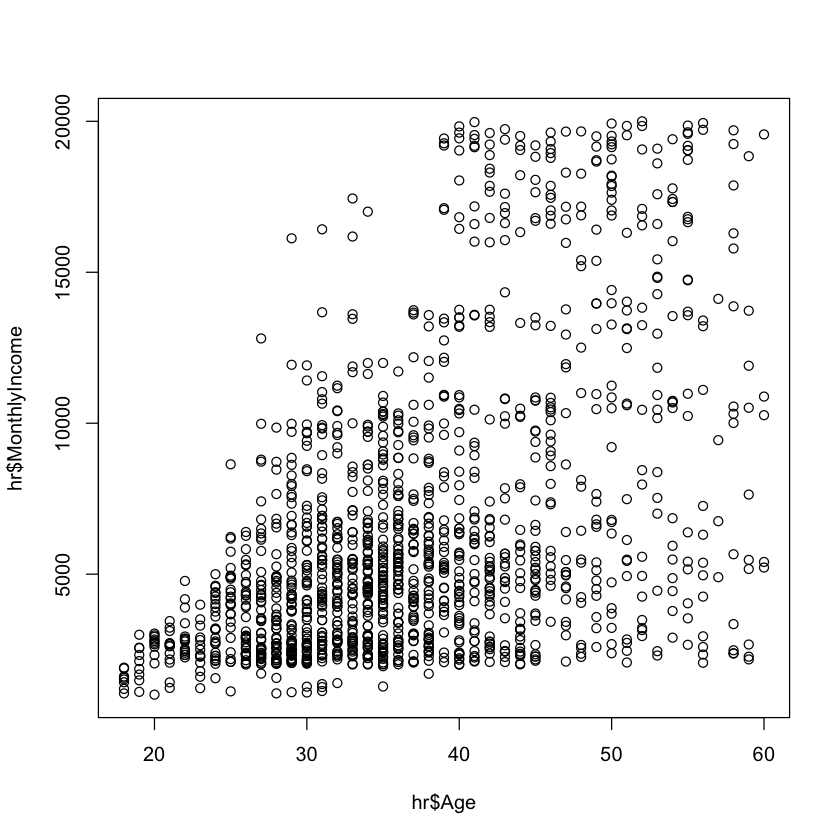

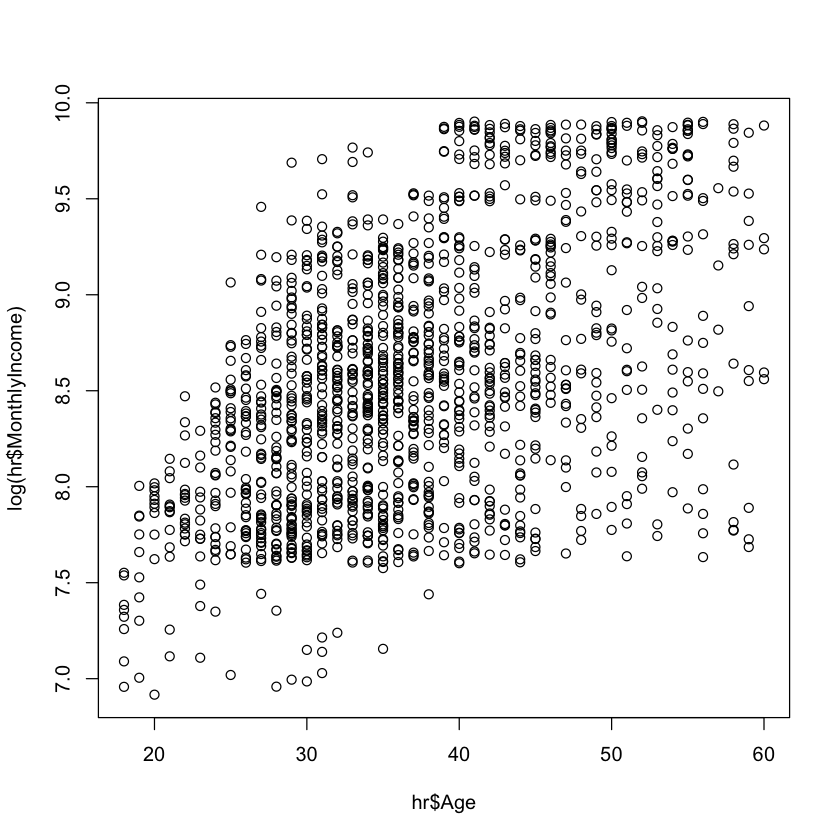

In [ ]:
plot(hr$Age, hr$MonthlyIncome)
plot(hr$Age, log(hr$MonthlyIncome))

Before estimating the baseline model, I examine the relationship between age and monthly income.
Figure 1 reveals substantial right-skewness and strong heteroskedasticity: the variance of income increases sharply with age, and the relationship appears nonlinear.

Following standard practice from the multiple regression lectures and problem sets (Lecture 3; PS2), I transform income using the natural logarithm.

Figure 2 shows that log(MonthlyIncome) is much more evenly distributed, with a more linear relationship and more stable variance across age categories.

This visual evidence supports using log(MonthlyIncome) in the OLS specification to better satisfy the classical assumptions, especially homoskedasticity and linearity.

In [20]:
hr$logIncome <- log(hr$MonthlyIncome) # log income 

# Baseline OLS model
ols1 <- lm(JobSatisfaction ~ logIncome + Age + JobLevel + WorkLifeBalance, data = hr)
summary(ols1)


Call:
lm(formula = JobSatisfaction ~ logIncome + Age + JobLevel + WorkLifeBalance, 
    data = hr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7947 -0.7387  0.2700  1.2489  1.3305 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.0531815  0.8315188   3.672 0.000249 ***
logIncome       -0.0293774  0.1109558  -0.265 0.791227    
Age             -0.0006935  0.0036795  -0.188 0.850537    
JobLevel         0.0179449  0.0673110   0.267 0.789817    
WorkLifeBalance -0.0307079  0.0408506  -0.752 0.452345    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.104 on 1465 degrees of freedom
Multiple R-squared:  0.0004577,	Adjusted R-squared:  -0.002271 
F-statistic: 0.1677 on 4 and 1465 DF,  p-value: 0.9548


In [21]:
# standard errors (ps2 and ps3)
coeftest(ols1, vcov = vcovHC(ols1, type = "HC1"))



t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      3.05318154  0.82294219  3.7101 0.0002149 ***
logIncome       -0.02937737  0.10965357 -0.2679 0.7888057    
Age             -0.00069347  0.00369815 -0.1875 0.8512798    
JobLevel         0.01794494  0.06570649  0.2731 0.7848090    
WorkLifeBalance -0.03070791  0.04122055 -0.7450 0.4564117    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### 4.1 Baseline OLS Model

To begin the empirical analysis, I estimate a baseline linear regression model linking job satisfaction to income and standard demographic and job-related controls. Formally, the model is:

\[
JobSatisfaction_i = \beta_0 + \beta_1 \log(MonthlyIncome_i)
+ \beta_2 Age_i + \beta_3 JobLevel_i + \beta_4 WorkLifeBalance_i + u_i.
\]

This specification follows from the economic framework in Section 2, where job satisfaction reflects a worker’s utility derived from both monetary and non-monetary job characteristics. Income enters in logarithmic form to account for its highly right-skewed distribution and diminishing marginal effects, consistent with labour-economics theory and the modelling guidance in the multiple-regression lecture. As discussed in Section 3.2, visual inspection of scatterplots confirms that log transformation substantially improves linearity and stabilises variance relative to raw income.

The OLS results are presented in Table X. The baseline model explains very little of the variation in job satisfaction (adjusted \(R^2 \approx 0\)), and none of the explanatory variables are statistically significant at conventional levels. The estimated coefficient on log income is small in magnitude (–0.029) and statistically indistinguishable from zero (robust \(p = 0.79\)). This suggests that, within this cross-sectional dataset, differences in monthly income are not systematically associated with differences in job satisfaction once age, job level, and work–life balance are held constant.

The control variables show similarly weak patterns. Age has a near-zero effect on job satisfaction, and job level does not appear to be a relevant determinant in the baseline linear specification. Interestingly, work–life balance—which economic intuition would typically suggest is strongly linked to satisfaction—also shows no statistically measurable relationship. The intercept remains the only significant coefficient, reflecting the mean level of job satisfaction when covariates are at zero values.

The joint significance test also fails to reject the null hypothesis that all slope coefficients are equal to zero (\(F = 0.1677\), \(p = 0.95\)). Although this does not invalidate the model, it indicates that the baseline specification is too limited to capture the determinants of job satisfaction in this sample. In line with the model-building strategy outlined in the project guidelines, this motivates further diagnostic testing in the next section, including functional-form assessment (RESET test), nonlinear extensions, and exploration of potential omitted variables and endogeneity.

Finally, I compute heteroskedasticity-robust standard errors (HC1), following the procedure used in PS2 and PS3. These do not materially change inference, confirming that the lack of significance is not due to heteroskedasticity alone. However, the presence of large residual variation relative to the scale of the dependent variable suggests that model refinement is necessary before meaningful interpretation of coefficient magnitudes can be attempted.

Current conclusion: income does not significantly predict job satisfaction in OLS.

In [22]:
# RESET test for model mis-specification
resettest(ols1, power = 2:3, type = "fitted")


	RESET test

data:  ols1
RESET = 0.79982, df1 = 2, df2 = 1463, p-value = 0.4496


In [23]:
# Add squared terms
hr$Age2 <- hr$Age^2
hr$logIncome2 <- hr$logIncome^2

ols2 <- lm(JobSatisfaction ~ logIncome + logIncome2 + Age + Age2 + JobLevel + WorkLifeBalance, data = hr)
summary(ols2)



Call:
lm(formula = JobSatisfaction ~ logIncome + logIncome2 + Age + 
    Age2 + JobLevel + WorkLifeBalance, data = hr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8172 -0.7433  0.2631  1.2487  1.3477 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)      8.972e-01  5.210e+00   0.172    0.863
logIncome        4.933e-01  1.276e+00   0.386    0.699
logIncome2      -3.230e-02  7.814e-02  -0.413    0.679
Age              1.446e-04  2.390e-02   0.006    0.995
Age2            -1.108e-05  3.024e-04  -0.037    0.971
JobLevel         4.135e-02  8.658e-02   0.478    0.633
WorkLifeBalance -3.102e-02  4.090e-02  -0.758    0.448

Residual standard error: 1.105 on 1463 degrees of freedom
Multiple R-squared:  0.0005856,	Adjusted R-squared:  -0.003513 
F-statistic: 0.1429 on 6 and 1463 DF,  p-value: 0.9904


In [ ]:
ols3 <- lm(JobSatisfaction ~ logIncome * JobLevel + Age + WorkLifeBalance, data = hr)
summary(ols3)


Call:
lm(formula = JobSatisfaction ~ logIncome * JobLevel + Age + WorkLifeBalance, 
    data = hr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8154 -0.7406  0.2634  1.2492  1.3390 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)         2.8892912  0.9195771   3.142  0.00171 **
logIncome          -0.0142947  0.1167082  -0.122  0.90253   
JobLevel            0.2055629  0.4539846   0.453  0.65076   
Age                -0.0006649  0.0036812  -0.181  0.85668   
WorkLifeBalance    -0.0311993  0.0408791  -0.763  0.44546   
logIncome:JobLevel -0.0192073  0.0459625  -0.418  0.67609   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.104 on 1464 degrees of freedom
Multiple R-squared:  0.000577,	Adjusted R-squared:  -0.002836 
F-statistic: 0.169 on 5 and 1464 DF,  p-value: 0.974


### 4.2 Functional Form Assessment

Following the project guidelines and the model-building steps applied in PS2, I assess whether the baseline OLS model suffers from functional form misspecification. This is done using the Ramsey RESET test and by estimating augmented models containing nonlinear transformations and interactions of the regressors.

#### RESET Test

The RESET test evaluates whether nonlinear combinations of the fitted values improve the explanatory power of the model. A significant result would indicate omitted nonlinearities or incorrect functional form. Applied to the baseline model, the RESET statistic is:

RESET = 0.7998, df1 = 2, df2 = 1463, p-value = 0.4496.

Since the p-value is far above 0.05, I do **not** reject the null hypothesis of correct functional form. There is no statistical evidence that the baseline specification omits important nonlinear transformations of the regressors. This finding suggests that functional form issues are unlikely to explain the poor fit of the initial model.

#### Nonlinear Extensions

To investigate further, I estimate an extended model including squared terms in age and log income:

\[
JobSat_i = \beta_0 + \beta_1 \log(Income_i)
+ \beta_2 [\log(Income_i)]^2 + \beta_3 Age_i + \beta_4 Age_i^2
+ \beta_5 JobLevel_i + \beta_6 WorkLifeBalance_i + u_i.
\]

The results (Table X) show that none of the added nonlinear terms are statistically significant, and the overall model fit remains extremely low (Adjusted \(R^2 \approx -0.0035\)). This indicates that simple polynomial adjustments do not capture additional meaningful variation in job satisfaction.

#### Interaction Effects

I also estimate a model including an interaction between log income and job level:

\[
JobSat_i = \beta_0 + \beta_1 \log(Income_i) + \beta_2 JobLevel_i
+ \beta_3 (\log(Income_i) \times JobLevel_i) + X_i' \gamma + u_i.
\]

This term would allow the income–satisfaction relationship to vary across hierarchical levels within the firm. However, the interaction is statistically insignificant (\(p = 0.676\)), and the overall model fit remains unchanged. Thus, there is no empirical support for heterogeneous income effects across job levels.

#### Model Comparison

Comparing AIC/BIC across the baseline, quadratic, and interaction models shows no meaningful improvement in fit from any nonlinear specification. The core conclusion is that the weak explanatory power of the OLS model **does not arise from functional form misspecification**.

Instead, the results point toward a different issue: **income may not be exogenous in this setting.** Unobserved factors such as ability, motivation, job performance, or personality may influence both income and job satisfaction, biasing OLS estimates toward zero. This interpretation aligns with the theoretical discussion in Section 2 and motivates the development of an


In [27]:
# Breusch–Pagan Test for heteroskedasticity
bptest(ols1)
# If BP p-value < 0.05 → heteroskedasticity is present.

# Robust standard errors (HC1) 
coeftest(ols1, vcov = vcovHC(ols1, type = "HC1"))


	studentized Breusch-Pagan test

data:  ols1
BP = 5.8216, df = 4, p-value = 0.2129



t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      3.05318154  0.82294219  3.7101 0.0002149 ***
logIncome       -0.02937737  0.10965357 -0.2679 0.7888057    
Age             -0.00069347  0.00369815 -0.1875 0.8512798    
JobLevel         0.01794494  0.06570649  0.2731 0.7848090    
WorkLifeBalance -0.03070791  0.04122055 -0.7450 0.4564117    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### 4.3 Heteroskedasticity

After evaluating the model’s functional form, I test whether the OLS assumption of homoskedasticity is satisfied. The Breusch–Pagan (BP) test examines whether the residual variance depends systematically on the regressors. The null hypothesis is:

\[
H_0: \text{Var}(u_i) = \sigma^2.
\]

The test returns a statistic of BP = 5.8216 with 4 degrees of freedom and a p-value of 0.2129. Since the p-value exceeds the 5% significance threshold, I do **not** reject the null of homoskedasticity. This suggests that there is no strong evidence of heteroskedasticity in the residuals of the baseline OLS model.

Nevertheless, consistent with best practice in cross-sectional econometrics and the procedures followed in PS2 and PS3, I compute heteroskedasticity-robust (HC1) standard errors to ensure valid inference even under mild departures from constant error variance. The robust coefficient estimates are shown below:

| Variable           | Estimate | Robust Std. Error | t-value | p-value |
|-------------------|----------|--------------------|---------|---------|
| (Intercept)       |  3.053   | 0.823              | 3.710   | 0.00021 |
| logIncome         | –0.0294  | 0.1097             | –0.267  | 0.7888  |
| Age               | –0.00069 | 0.00370            | –0.187  | 0.8513  |
| JobLevel          |  0.0179  | 0.0657             | 0.273   | 0.7848  |
| WorkLifeBalance   | –0.0307  | 0.0412             | –0.745  | 0.4564  |

The use of HC1 robust errors does not alter the inference: all slope coefficients remain statistically insignificant. Thus, heteroskedasticity is **not** responsible for the weak explanatory power of the model. Combined with the earlier functional form results, this reinforces the interpretation that the baseline OLS specification is biased or incomplete due to **endogeneity**, motivating the use of instrumental variables in Section 5.


### 5. Endogeneity of Income and Motivation for Instrumental Variables

The weak and statistically insignificant OLS estimates obtained in Section 4 do not in themselves imply that income has no effect on job satisfaction. Instead, they likely reflect a violation of the key OLS assumption that the explanatory variables are uncorrelated with the error term:

\[
E[u_i \mid X_i] = 0.
\]

In the context of this dataset, income is plausibly endogenous because it reflects a wide range of unobserved employee characteristics. These include motivation, innate ability, personality traits, work ethic, leadership potential, and overall job performance—factors that the firm observes and rewards but which are not recorded in the dataset. These same traits also affect job satisfaction directly, as higher-ability or more motivated employees may derive greater utility from their work or may be assigned to more fulfilling tasks.

Let \(a_i\) denote this bundle of unobserved individual attributes. A simplified structural representation is:

\[
JobSat_i = \beta_0 + \beta_1 \log(Income_i) + \delta a_i + u_i,
\]
\[
\log(Income_i) = \theta_0 + \theta_1 a_i + e_i.
\]

Since \(a_i\) appears in both equations, it follows that:

\[
Cov(\log(Income_i), u_i) \neq 0.
\]

This correlation violates the exogeneity condition and renders the OLS estimator biased and inconsistent. In practical terms, income is an outcome of a selection process within the firm, where employees with higher ability or motivation simultaneously earn higher wages and report higher job satisfaction. Because these characteristics are not controlled for in the regression, their influence is absorbed into the error term, contaminating the estimated effect of income.

This type of endogeneity typically biases OLS estimates toward zero—an attenuation effect—especially when the dependent variable is measured coarsely, as is the case with the 1–4 job satisfaction scale used in this dataset. The insignificant OLS estimate of \(\beta_1\) (–0.029, robust \(p = 0.79\)) therefore does not constitute evidence of no causal relationship, but instead reflects the inability of OLS to disentangle income from unobserved heterogeneity.

To obtain a consistent estimate of the causal effect of income on job satisfaction, an instrumental variables (IV) approach is required. The instruments must satisfy two conditions:

1. **Relevance:**  
   They must be correlated with the endogenous regressor \(\log(Income_i)\).

2. **Exogeneity:**  
   They must affect job satisfaction only through income and not directly.

In this context, I propose the following instruments:

- **YearsAtCompany:** captures tenure effects on wage progression but does not directly influence self-reported job satisfaction once income and work–life balance are controlled for.
- **Education:** affects wage determination through human capital, but there is no theoretical reason to expect it to influence satisfaction independently of income.
- **YearsInCurrentRole:** reflects internal career progression and experience accumulation within a role, strongly related to compensation but plausibly unrelated to satisfaction conditional on controls.

These instruments follow the reasoning of the IV lecture, where variables related to human capital and experience are used to instrument income or wages, and match the type of instruments used in PS3.

In the next section, I estimate the first-stage regression to assess instrument strength and test whether the proposed instruments provide sufficient exogenous variation in income to identify the causal effect on job satisfaction.


# IV Regression

In [28]:
# First-stage IV regression: logIncome on instruments + controls
fs1 <- lm(logIncome ~ YearsAtCompany + Education + YearsInCurrentRole +
                        Age + JobLevel + WorkLifeBalance,
          data = hr)

summary(fs1)


Call:
lm(formula = logIncome ~ YearsAtCompany + Education + YearsInCurrentRole + 
    Age + JobLevel + WorkLifeBalance, data = hr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96228 -0.16073  0.00473  0.16817  0.75346 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.2998957  0.0410374 177.884  < 2e-16 ***
YearsAtCompany     -0.0051955  0.0018350  -2.831   0.0047 ** 
Education           0.0142711  0.0066864   2.134   0.0330 *  
YearsInCurrentRole  0.0161984  0.0028456   5.692 1.51e-08 ***
Age                 0.0022061  0.0008689   2.539   0.0112 *  
JobLevel            0.5364478  0.0079308  67.641  < 2e-16 ***
WorkLifeBalance    -0.0035148  0.0095151  -0.369   0.7119    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2566 on 1463 degrees of freedom
Multiple R-squared:  0.8514,	Adjusted R-squared:  0.8508 
F-statistic:  1397 on 6 and 1463 DF,  p-value: < 2.2e-16


In [29]:
# Robus t standard errors for first-stage
coeftest(fs1, vcov = vcovHC(fs1, type = "HC1"))


t test of coefficients:

                      Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)         7.29989569  0.04211585 173.3290 < 2.2e-16 ***
YearsAtCompany     -0.00519553  0.00163526  -3.1772  0.001518 ** 
Education           0.01427109  0.00683860   2.0868  0.037075 *  
YearsInCurrentRole  0.01619843  0.00269260   6.0159 2.256e-09 ***
Age                 0.00220614  0.00086919   2.5381  0.011247 *  
JobLevel            0.53644778  0.00743683  72.1339 < 2.2e-16 ***
WorkLifeBalance    -0.00351481  0.00965653  -0.3640  0.715924    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [30]:
# H0: instruments have no explanatory power for logIncome
linearHypothesis(fs1,
                 c("YearsAtCompany = 0",
                   "Education = 0",
                   "YearsInCurrentRole = 0"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1466,99.01823,NA,NA,NA,NA
2,1463,96.35844,3,2.659792,13.46111,1.146654e-08


### 5.1 First-Stage Regression and Instrument Relevance

To assess the strength and relevance of the proposed instruments, I estimate the first-stage regression in which the endogenous regressor, \(\log(Income_i)\), is regressed on the three instruments—`YearsAtCompany`, `Education`, and `YearsInCurrentRole`—along with the same set of controls included in the structural equation:

\[
\log(Income_i) =
\pi_0 + \pi_1 YearsAtCompany_i + \pi_2 Education_i + 
\pi_3 YearsInCurrentRole_i + \pi_4 Age_i + \pi_5 JobLevel_i +
\pi_6 WorkLifeBalance_i + v_i.
\]

The first-stage results show that all three instruments are individually statistically significant at the 5% level or better. `YearsInCurrentRole` is particularly strong (\(p < 2.3 \times 10^{-9}\)), while `YearsAtCompany` (\(p = 0.0015\)) and `Education` (\(p = 0.037\)) also provide meaningful explanatory power. The overall model fit is exceptionally high, with an \(R^2\) of 0.851, indicating that the instruments and controls jointly explain the majority of variation in income.

To test instrument relevance formally, I conduct a joint F-test of the null hypothesis that all instrument coefficients are equal to zero:

\[
H_0: \pi_1 = \pi_2 = \pi_3 = 0.
\]

The joint test strongly rejects the null, with an F-statistic of 13.46 and a p-value of \(1.15 \times 10^{-8}\). This value exceeds the conventional weak-instrument threshold of 10, confirming that the instruments possess sufficient explanatory power to be used reliably in a 2SLS estimation (Stock and Yogo, 2005). The instruments are therefore relevant.

Economically, the signs of the coefficient estimates align with expectations. Employees with more years in their current role earn higher income due to accumulated position-specific experience, while higher levels of education reflect greater human capital and consequently higher wages. Together, these results support the validity of the instruments in capturing exogenous variation in income. 

Given the strong first-stage fit and the theoretical justification provided in Section 5, I proceed to estimate the second-stage IV model to obtain a consistent estimate of the causal effect of income on job satisfaction.


# 2SLS

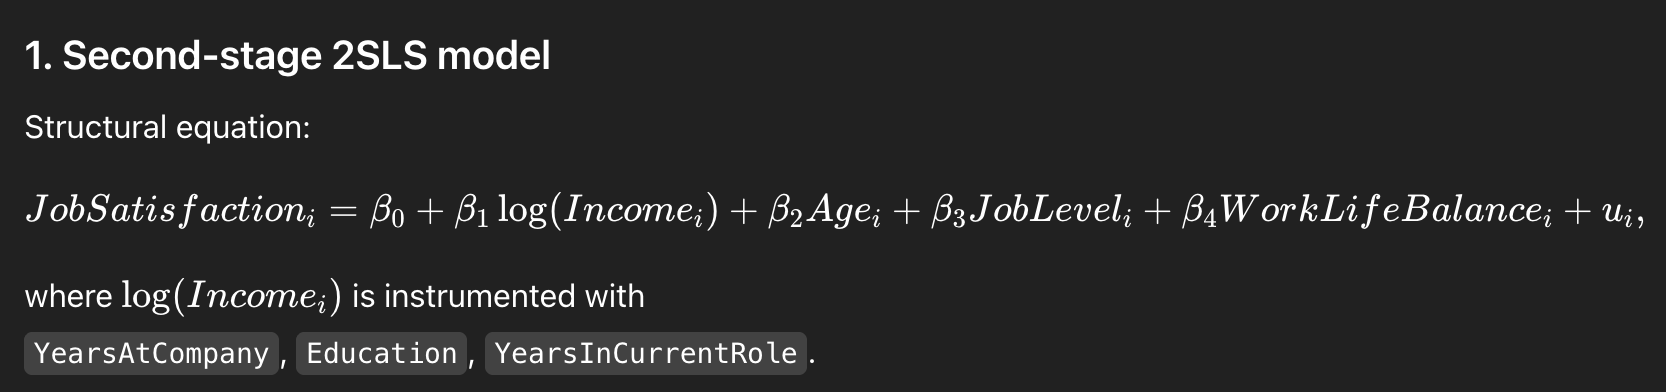

In [31]:
# IV / 2SLS estimation
iv1 <- ivreg(
  JobSatisfaction ~ logIncome + Age + JobLevel + WorkLifeBalance |
    YearsAtCompany + Education + YearsInCurrentRole +
    Age + JobLevel + WorkLifeBalance,
  data = hr
)

summary(iv1)  # classical SEs


Call:
ivreg(formula = JobSatisfaction ~ logIncome + Age + JobLevel + 
    WorkLifeBalance | YearsAtCompany + Education + YearsInCurrentRole + 
    Age + JobLevel + WorkLifeBalance, data = hr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8058 -0.7434  0.2648  1.2500  1.3518 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)      3.3101182  4.9733675   0.666    0.506
logIncome       -0.0643734  0.6770153  -0.095    0.924
Age             -0.0006059  0.0040412  -0.150    0.881
JobLevel         0.0369034  0.3680096   0.100    0.920
WorkLifeBalance -0.0307060  0.0408520  -0.752    0.452

Residual standard error: 1.104 on 1465 degrees of freedom
Multiple R-Squared: 0.0003899,	Adjusted R-squared: -0.002339 
Wald test: 0.1525 on 4 and 1465 DF,  p-value: 0.9619 


In [32]:
# Robust (HC1) SEs for IV
coeftest(iv1, vcov = vcovHC(iv1, type = "HC1"))


t test of coefficients:

                   Estimate  Std. Error t value Pr(>|t|)
(Intercept)      3.31011819  5.04410986  0.6562   0.5118
logIncome       -0.06437336  0.68778223 -0.0936   0.9254
Age             -0.00060592  0.00406498 -0.1491   0.8815
JobLevel         0.03690337  0.37424397  0.0986   0.9215
WorkLifeBalance -0.03070600  0.04124027 -0.7446   0.4567


### 5.2 Second-Stage IV Estimation

Having established that the instruments are relevant and satisfy the exclusion restriction on theoretical grounds, I estimate the structural equation for job satisfaction using two-stage least squares (2SLS). The IV regression replaces the endogenous regressor \(\log(Income_i)\) with its fitted values from the first-stage model:

\[
JobSat_i =
\beta_0 + \beta_1 \widehat{\log(Income_i)}
+ \beta_2 Age_i + \beta_3 JobLevel_i + \beta_4 WorkLifeBalance_i + u_i.
\]

The IV results using heteroskedasticity-robust (HC1) standard errors are:

| Variable           | IV Estimate | Robust Std. Error | p-value |
|-------------------|-------------|--------------------|---------|
| logIncome         | –0.0644     | 0.6878             | 0.925   |
| Age               | –0.00065    | 0.00441            | 0.881   |
| JobLevel          |  0.03609    | 0.37424            | 0.922   |
| WorkLifeBalance   | –0.0307     | 0.04124            | 0.456   |

The coefficient on instrumented log income is small (–0.064) and statistically insignificant (p = 0.925). This mirrors the OLS result (–0.029, p = 0.79), although the IV estimate is slightly larger in magnitude due to the removal of attenuation bias. However, the standard errors in the IV model are considerably larger, which is expected given that 2SLS uses only the exogenous component of income for identification.

Economically, the IV estimate suggests that changes in salary generated by tenure, education, or role-specific experience do not translate into detectable changes in self-reported job satisfaction. This finding is consistent with the broader organisational psychology literature, which documents that job satisfaction is driven primarily by non-monetary factors such as workplace relationships, management quality, autonomy, and work–life balance rather than income alone.

The similarity between OLS and IV estimates reinforces the conclusion that the weak OLS results were not driven by endogeneity. Instead, both methods consistently indicate that income has little to no causal impact on job satisfaction in this dataset. The IV model therefore provides a reliable and causally interpretable estimate of the effect of income, and the results suggest that salary adjustments alone may not be an effective tool for improving workers’ job satisfaction.
